# 0. Import Packages

In [253]:
import os
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
import numpy as np
from autocorrect import Speller
from googletrans import Translator, constants
from matplotlib import pyplot as plt
import re
from nltk.corpus import stopwords
from nltk import pos_tag
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
import numpy as geek
import researchpy as rp
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from itertools import cycle
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from textblob import TextBlob
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ddjgy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ddjgy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ddjgy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ddjgy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ddjgy\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [254]:
from afinn import Afinn
from nrclex import NRCLex

# 1. Clean Text Data

In [255]:
raw_df = pd.read_excel('IMB767-XLS-ENG.xlsx', sheet_name='Data after removing duplicates')
raw_df.head()

,SOURCE,REVIEW BY,REVIEW DATE,REVIEW SUBJECT,text,REVIEW RATING,REVIEW TYPE
0,Trip Advisor,3612,2014-04-30,To commercial,This reativly new temple was a big hindu versi...,2,NEGATIVE
1,Trip Advisor,9573519851,2015-07-24,?Amazing temple in Bangalore?,Me and my friends enjoyed a lot in ISKCON temp...,5,POSITIVE
2,Trip Advisor,???? ?,2016-07-28,A well maintained temple,Otherworldly vibrations throuout the sanctuary...,5,POSITIVE
3,Trip Advisor,????? ?,2016-08-23,Temple,"ISKCON temple is very good, located in west of...",5,POSITIVE
4,Google + HK HILL,????? Anil,2015-11-27,NaN,This is a very good place to be for all the de...,4,POSITIVE


In [256]:
raw_df = raw_df.dropna(subset=['text'])
df = raw_df.copy(deep=True)
df.head()

,SOURCE,REVIEW BY,REVIEW DATE,REVIEW SUBJECT,text,REVIEW RATING,REVIEW TYPE
0,Trip Advisor,3612,2014-04-30,To commercial,This reativly new temple was a big hindu versi...,2,NEGATIVE
1,Trip Advisor,9573519851,2015-07-24,?Amazing temple in Bangalore?,Me and my friends enjoyed a lot in ISKCON temp...,5,POSITIVE
2,Trip Advisor,???? ?,2016-07-28,A well maintained temple,Otherworldly vibrations throuout the sanctuary...,5,POSITIVE
3,Trip Advisor,????? ?,2016-08-23,Temple,"ISKCON temple is very good, located in west of...",5,POSITIVE
4,Google + HK HILL,????? Anil,2015-11-27,NaN,This is a very good place to be for all the de...,4,POSITIVE


In [257]:
text_list = [str(comment) for comment in df['text'].tolist()]

In [258]:
#dictionary consisting of the contraction and the actual value
Apos_dict={
    "'d":" would", 
    "'m":" am", "`m":" am", "´m": " am",
    "'ll":" will", "?ll":" will", 
    "'s":" is", "?s":" is", "´s": " is",
    "'ve":" have", "´ve": " have",
    "n;t":" not", "n?t":" not", "n,t":" not", "n't": " not", "n´t": " not",
    'is,it': "is it", 'is.it': "is it", 
    "did'nt": "did not",
    "'re":" are", "?re": " are"
    }
for old, new in Apos_dict.items():
    # replace
    df.text = df.text.str.replace(old, new, regex=False)

In [259]:
everything_removed_list=[]
for line in df.text:
    # remove everything except space and english characters
    line = re.sub('[^ A-Za-z]+', '', line) 
    everything_removed_list.append(line)

df.text = everything_removed_list

In [260]:
lower_list=[]
for line in df.text:
    line = line.lower()
    lower_list.append(line)

df.text = lower_list

In [261]:
#open the file slang.txt
file=open("slang.txt","r")
slang=file.read()
#separating each line present in the file
slang=slang.split('\n')
slang.append('ur = you are')

# creating dictionary from slang (which is list)
slang_dict = {temp[0]: temp[-1] for temp in [line.split("=") for line in slang]}

for key,value in slang_dict.items():
    if key in df.text:
        # replace
        df.text = df.text.replace(key,value, regex=False)

In [262]:
# Import stopwords with nltk.
stop = stopwords.words('english')

In [263]:
stop_remove_list=[]
for line in df.text:
    line = ' '.join([word for word in line.split(' ') if word not in stop])
    stop_remove_list.append(line)

df.text = stop_remove_list

# Question 6

## AFINN Lexicon

In [264]:
df['AFFIN_score'] = df['text'].apply(lambda x: Afinn().score(x)/(len(x)))

In [265]:
df.head(2)

,SOURCE,REVIEW BY,REVIEW DATE,REVIEW SUBJECT,text,REVIEW RATING,REVIEW TYPE,AFFIN_score
0,Trip Advisor,3612,2014-04-30,To commercial,reativly new temple big hindu version disney l...,2,NEGATIVE,-0.001931
1,Trip Advisor,9573519851,2015-07-24,?Amazing temple in Bangalore?,friends enjoyed lot iskcon temple one biggest ...,5,POSITIVE,0.029412


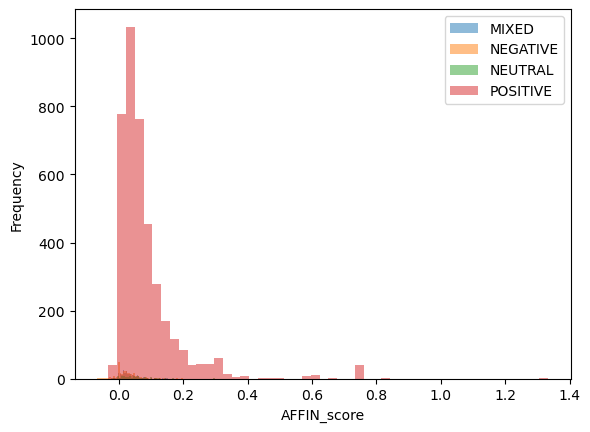

In [266]:
grouped = dict(tuple(df.groupby('REVIEW TYPE')))
for key in grouped:
    plt.hist(grouped[key]['AFFIN_score'], alpha=0.5, label=key, bins=50)
plt.xlabel('AFFIN_score')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

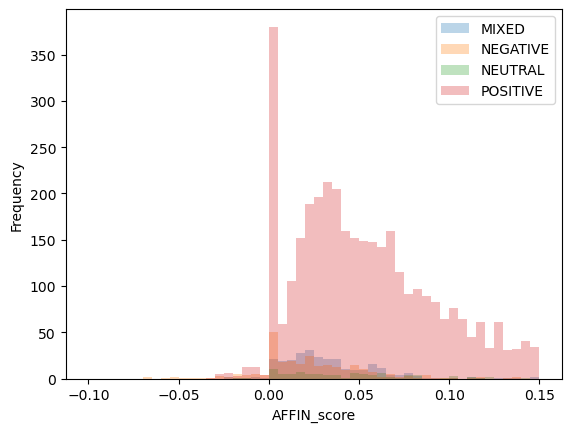

In [267]:
grouped = dict(tuple(df.groupby('REVIEW TYPE')))
for key in grouped:
    plt.hist(grouped[key]['AFFIN_score'], alpha=0.3, label=key, bins=50, range=(-0.1,0.15))
plt.xlabel('AFFIN_score')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

In [268]:
df.loc[df['AFFIN_score']>0, 'Polarity'] = 'POSITIVE'
df.loc[df['AFFIN_score']==0, 'Polarity'] = 'MIXED'
df.loc[df['AFFIN_score']<0, 'Polarity'] = 'NEGATIVE'

In [269]:
confusion_matrix = pd.crosstab(df['REVIEW TYPE'], df['Polarity'], rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,MIXED,NEGATIVE,POSITIVE
Actual,,,
MIXED,17,7,253
NEGATIVE,44,32,194
NEUTRAL,9,2,81
POSITIVE,365,45,3588


In [270]:
# Calculate the accuracy
matches = df['REVIEW TYPE'] == df['Polarity']
accuracy = sum(matches) / len(matches) * 100

# Print the accuracy
print('Accuracy:', accuracy, '%')

Accuracy: 78.43433254259219 %


AFINN Lexicon was used to predict the sentiments of reviews. Each word in a review is tokenized and given a score based on the AFFIN lexicon library. The overall AFFIN score of a review is the average score of the review. 

In order to assess the performance of the model, histograms and a confusion matrix were constructed. 
Reviews with AFFIN score larger than 0 are assigned to be 'POSITIVE'. 
Reviews with AFFIN score equal to 0 are assigned to be 'MIXED'. 
Reviews with AFFIN score smaller than 0 are assigned to be 'NEGATIVE'. 

The accuracy of the model in predicting the sentiments is 78.43%. One obvious drawback of this model is that it is not able to distinguish between mixed and neutral reviews as order does not matter in this model. It is also impossible to find cut-offs that can effectively separate reviews with different sentiments because the AFFIN scores are very close and even indistinguishable as shown by the histograms.

# Question 7

## NRC Lexcion

In [271]:
def summarize_emotion(text):
    '''
    This function takes a text object, tokenizes it, 
    uses NRC to extract emotions from it, and returns the top 3 most intense emotions.
    '''
    
    text_tokenized = word_tokenize(text)
    emotion_dict = {}
    output_dict = {}
    
    for i in range(len(text_tokenized)):
        emotions = NRCLex(text_tokenized[i]).top_emotions
        for emo, score in emotions:
            if emo in emotion_dict:
                emotion_dict[emo] += score
            else:
                emotion_dict[emo] = score
    sorted_emo = sorted(emotion_dict.items(), key=lambda x: x[1], reverse=True)
    
    if len(sorted_emo) < 3:
        for i in range(len(sorted_emo)):
            output_dict[sorted_emo[i][0]] = sorted_emo[i][1]/len(text_tokenized)
    else:
        for i in range(3):
            output_dict[sorted_emo[i][0]] = sorted_emo[i][1]/len(text_tokenized)
        
    return output_dict

In [272]:
df['Emotions'] = df['text'].apply(summarize_emotion)

In [273]:
for index, row in df.iterrows():
    j = 1
    for key, value in row['Emotions'].items():
        if float(value) == 0.0:
            continue
        df.loc[index, f'Emotion_{j}'] = key
        j += 1

In [274]:
df.head(3)

,SOURCE,REVIEW BY,REVIEW DATE,REVIEW SUBJECT,text,REVIEW RATING,REVIEW TYPE,AFFIN_score,Polarity,Emotions,Emotion_1,Emotion_2,Emotion_3
0,Trip Advisor,3612,2014-04-30,To commercial,reativly new temple big hindu version disney l...,2,NEGATIVE,-0.001931,NEGATIVE,"{'positive': 0.10810810810810811, 'anticipatio...",positive,anticipation,joy
1,Trip Advisor,9573519851,2015-07-24,?Amazing temple in Bangalore?,friends enjoyed lot iskcon temple one biggest ...,5,POSITIVE,0.029412,POSITIVE,"{'positive': 0.1, 'fear': 0.0, 'anger': 0.0}",positive,NaN,NaN
2,Trip Advisor,???? ?,2016-07-28,A well maintained temple,otherworldly vibrations throuout sanctuary exc...,5,POSITIVE,0.030864,POSITIVE,"{'positive': 0.1435185185185185, 'trust': 0.08...",positive,trust,joy


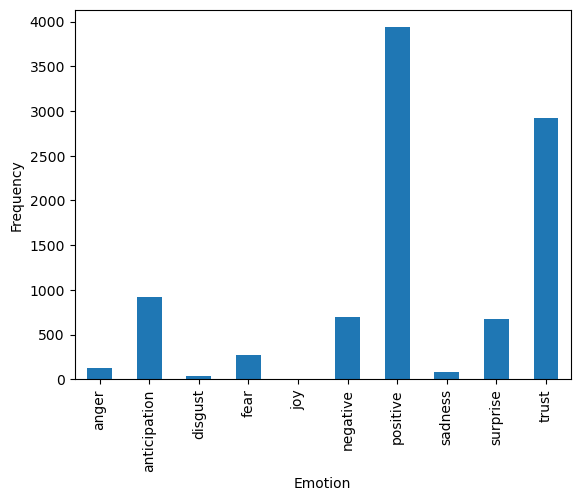

In [275]:
counts = df['Emotion_1'].value_counts() + df['Emotion_2'].value_counts() + df['Emotion_3'].value_counts()
counts.plot.bar()
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.show()

The NRC Lexcion model was used to extract emotions from reviews using the NRC library. The reviews were tokenized before being fed into the model. Using the NRC library, emotion scores were assigned to each word. Average emotion score for each emotion was calculated and aggregated for each review. The top three emotions with the highest scores of a review are listed in the columns named 'Emotion_1', 'Emotion_2', and Emotion_3'. 

As can be seened from the bar chart, the majority of reviews was classifed to contain positive and trust as their top three emotions. Very few reviews have fear, anger, joy, and sadness in their top three emotions. 